In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

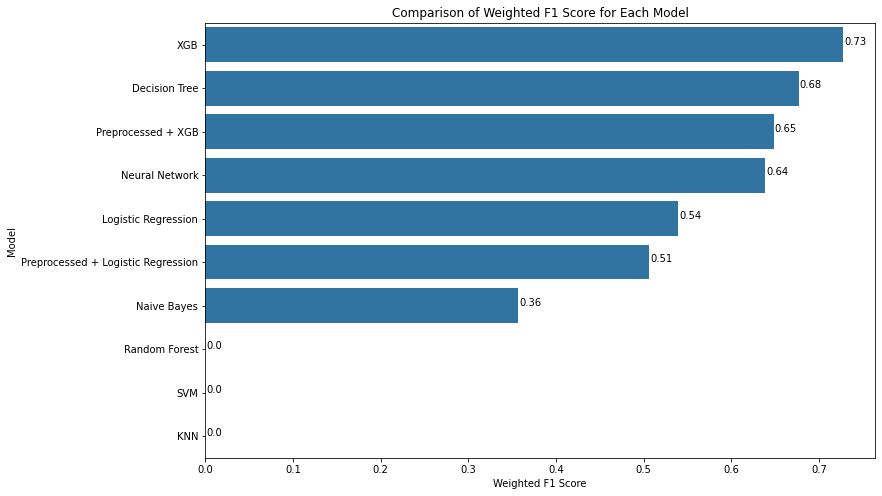

In [24]:
df = pd.read_csv('../Resources/Datasets/results.csv', index_col=0)

plt.figure(figsize=(12, 8))
ax = sns.barplot(x='weighted_f1_score', y=df.index, data=df, order=df.sort_values('weighted_f1_score', ascending=False).index)
plt.title('Comparison of Weighted F1 Score for Each Model')
plt.xlabel('Weighted F1 Score')
plt.ylabel('Model')

# Add annotations for each bar
for i, v in enumerate(df['weighted_f1_score'].sort_values(ascending=False)):
    ax.text(v + 0.001, i, str(round(v, 2)), color='black', ha='left')

plt.show()

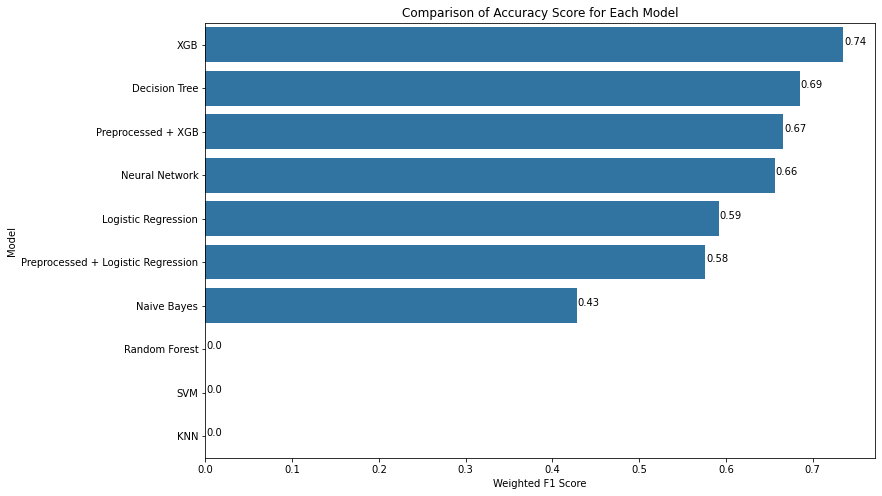

In [27]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='accuracy', y=df.index, data=df, order=df.sort_values('accuracy', ascending=False).index)
plt.title('Comparison of Accuracy Score for Each Model')
plt.xlabel('Weighted F1 Score')
plt.ylabel('Model')

for i, v in enumerate(df['accuracy'].sort_values(ascending=False)):
    ax.text(v + 0.001, i, str(round(v, 2)), color='black', ha='left')

plt.show()

### Best Model: XGBoost

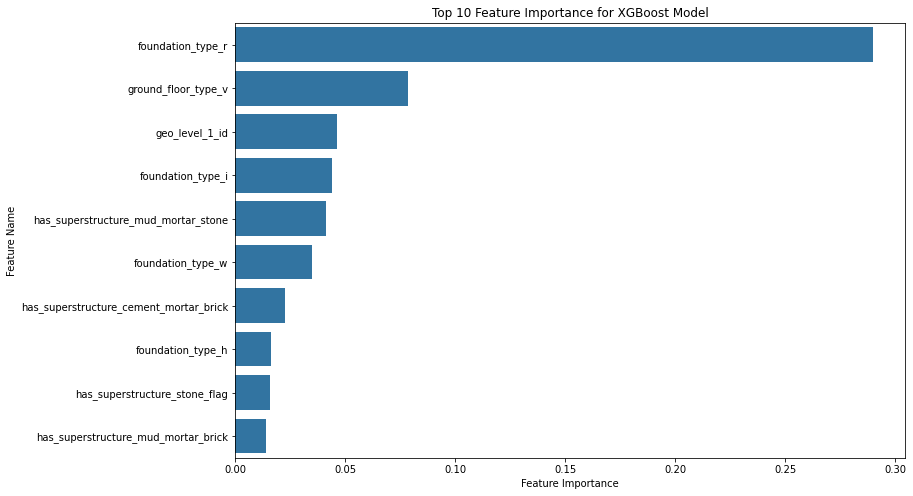

In [37]:
# read xgboost pickle file
with open('../Models/xgb_model.pkl', 'rb') as file:
    xgboost = pickle.load(file)

X_train = pd.read_csv('../Resources/Datasets/X_train.csv', index_col = 'building_id')

feature_importance = xgboost.feature_importances_
feature_name = X_train.columns

feature_importance_df = pd.DataFrame({'feature_name': feature_name, 'feature_importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values('feature_importance', ascending=False)


plt.figure(figsize=(12, 8))
ax = sns.barplot(x='feature_importance', y='feature_name', data=feature_importance_df[:10])
plt.title('Top 10 Feature Importance for XGBoost Model')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')

plt.show()
